<a href="https://www.kaggle.com/code/lalit7881/nap-vs-coffee-ml-study-84-06-r-accuracy?scriptVersionId=297452933" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/power-nap-vs-coffee-effectiveness-dataset/power_nap_vs_coffee_effectiveness_dataset.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/power-nap-vs-coffee-effectiveness-dataset/power_nap_vs_coffee_effectiveness_dataset.csv")

In [3]:
df.head()

,participant_id,age,occupation,sleep_hours_previous_night,intervention_type,intervention_duration_minutes,alertness_score_before,alertness_score_after,productivity_rating,mood_rating,side_effects
0,1,24,Working Professional,5.4,Power Nap,15,62,77,5,10,Grogginess
1,2,37,Student,5.6,Power Nap,30,67,83,6,5,NaN
2,3,32,Working Professional,4.4,Coffee,30,44,52,2,5,Anxiety
3,4,28,Student,6.9,Coffee,30,59,70,4,6,Crash
4,5,25,Working Professional,4.7,Power Nap,30,40,58,3,6,Grogginess


In [4]:
df.tail()

,participant_id,age,occupation,sleep_hours_previous_night,intervention_type,intervention_duration_minutes,alertness_score_before,alertness_score_after,productivity_rating,mood_rating,side_effects
495,496,34,Freelancer,4.2,Coffee,30,64,75,6,8,NaN
496,497,41,Freelancer,6.1,Power Nap,25,42,59,1,4,Grogginess
497,498,36,Student,7.8,Power Nap,30,47,65,2,2,NaN
498,499,43,Working Professional,4.4,Power Nap,20,72,87,6,5,Grogginess
499,500,40,Working Professional,7.6,Power Nap,15,74,95,2,2,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   participant_id                 500 non-null    int64  
 1   age                            500 non-null    int64  
 2   occupation                     500 non-null    object 
 3   sleep_hours_previous_night     500 non-null    float64
 4   intervention_type              500 non-null    object 
 5   intervention_duration_minutes  500 non-null    int64  
 6   alertness_score_before         500 non-null    int64  
 7   alertness_score_after          500 non-null    int64  
 8   productivity_rating            500 non-null    int64  
 9   mood_rating                    500 non-null    int64  
 10  side_effects                   293 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 43.1+ KB


In [6]:
df.describe()

,participant_id,age,sleep_hours_previous_night,intervention_duration_minutes,alertness_score_before,alertness_score_after,productivity_rating,mood_rating
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,30.928000,6.058600,22.300000,57.380000,71.230000,5.374000,5.422000
std,144.481833,8.147612,1.136842,5.654551,9.943306,11.420067,2.842232,2.908752
min,1.000000,18.000000,4.000000,15.000000,40.000000,46.000000,1.000000,1.000000
25%,125.750000,24.000000,5.100000,15.000000,49.000000,62.000000,3.000000,3.000000
50%,250.500000,31.000000,6.100000,20.000000,58.000000,72.000000,5.000000,5.000000
75%,375.250000,38.000000,7.000000,25.000000,65.000000,79.250000,8.000000,8.000000
max,500.000000,44.000000,8.000000,30.000000,74.000000,97.000000,10.000000,10.000000


In [7]:
df.isnull().sum()

participant_id                     0
age                                0
occupation                         0
sleep_hours_previous_night         0
intervention_type                  0
intervention_duration_minutes      0
alertness_score_before             0
alertness_score_after              0
productivity_rating                0
mood_rating                        0
side_effects                     207
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

participant_id                     int64
age                                int64
occupation                        object
sleep_hours_previous_night       float64
intervention_type                 object
intervention_duration_minutes      int64
alertness_score_before             int64
alertness_score_after              int64
productivity_rating                int64
mood_rating                        int64
side_effects                      object
dtype: object

In [10]:
df.shape

(500, 11)

In [11]:
df.columns

Index(['participant_id', 'age', 'occupation', 'sleep_hours_previous_night',
       'intervention_type', 'intervention_duration_minutes',
       'alertness_score_before', 'alertness_score_after',
       'productivity_rating', 'mood_rating', 'side_effects'],
      dtype='object')

In [12]:
# Fill missing side effects
df["side_effects"] = df["side_effects"].fillna("None")

In [13]:
df.describe()

,participant_id,age,sleep_hours_previous_night,intervention_duration_minutes,alertness_score_before,alertness_score_after,productivity_rating,mood_rating
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,30.928000,6.058600,22.300000,57.380000,71.230000,5.374000,5.422000
std,144.481833,8.147612,1.136842,5.654551,9.943306,11.420067,2.842232,2.908752
min,1.000000,18.000000,4.000000,15.000000,40.000000,46.000000,1.000000,1.000000
25%,125.750000,24.000000,5.100000,15.000000,49.000000,62.000000,3.000000,3.000000
50%,250.500000,31.000000,6.100000,20.000000,58.000000,72.000000,5.000000,5.000000
75%,375.250000,38.000000,7.000000,25.000000,65.000000,79.250000,8.000000,8.000000
max,500.000000,44.000000,8.000000,30.000000,74.000000,97.000000,10.000000,10.000000


## EDA

In [14]:
import plotly.express as px
import plotly.graph_objects as go

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

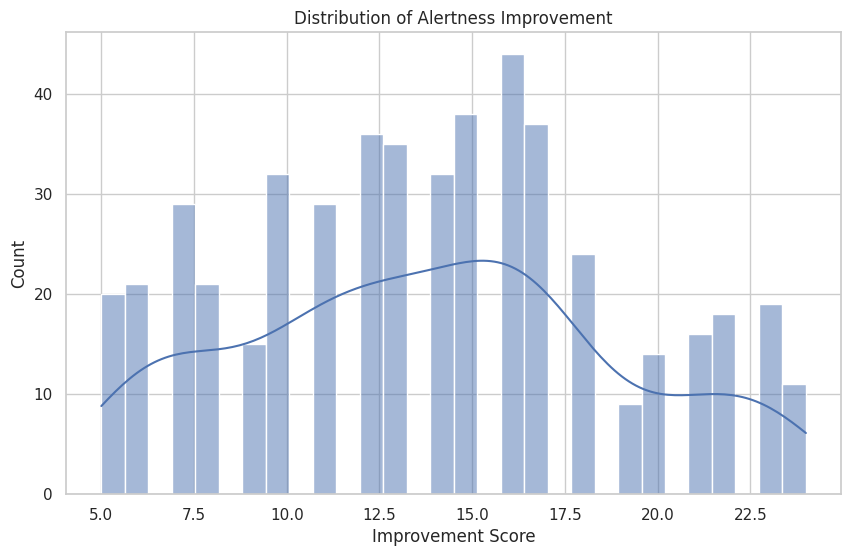

In [15]:
df["alertness_improvement"] = df["alertness_score_after"] - df["alertness_score_before"]

plt.figure()
sns.histplot(df["alertness_improvement"], bins=30, kde=True)
plt.title("Distribution of Alertness Improvement")
plt.xlabel("Improvement Score")
plt.show()


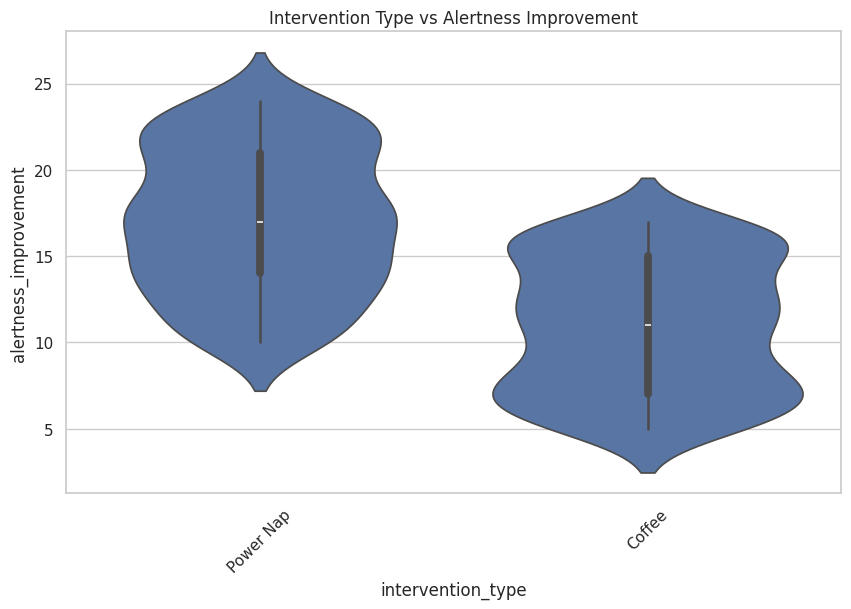

In [16]:
plt.figure()
sns.violinplot(data=df, x="intervention_type", y="alertness_improvement")
plt.title("Intervention Type vs Alertness Improvement")
plt.xticks(rotation=45)
plt.show()


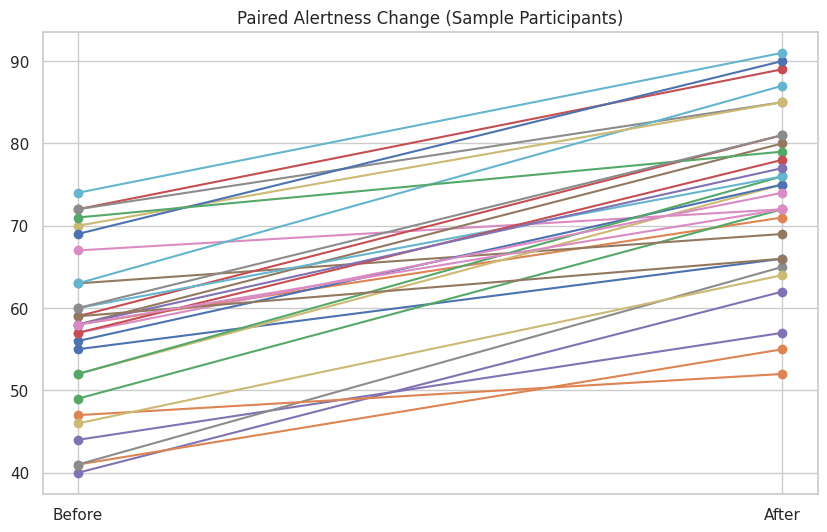

In [17]:
sample_df = df.sample(30)

plt.figure()
for _, row in sample_df.iterrows():
    plt.plot(["Before", "After"],
             [row["alertness_score_before"], row["alertness_score_after"]],
             marker='o')

plt.title("Paired Alertness Change (Sample Participants)")
plt.show()


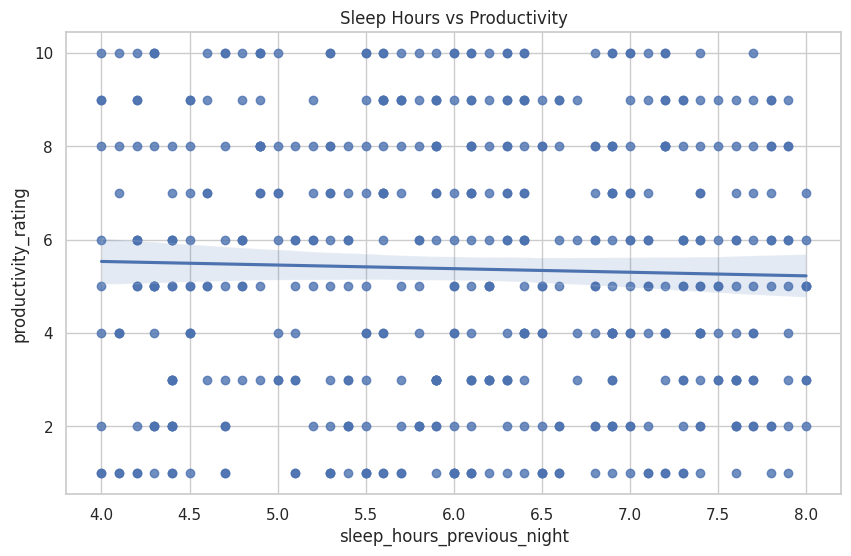

In [18]:
plt.figure()
sns.regplot(data=df, x="sleep_hours_previous_night", y="productivity_rating")
plt.title("Sleep Hours vs Productivity")
plt.show()


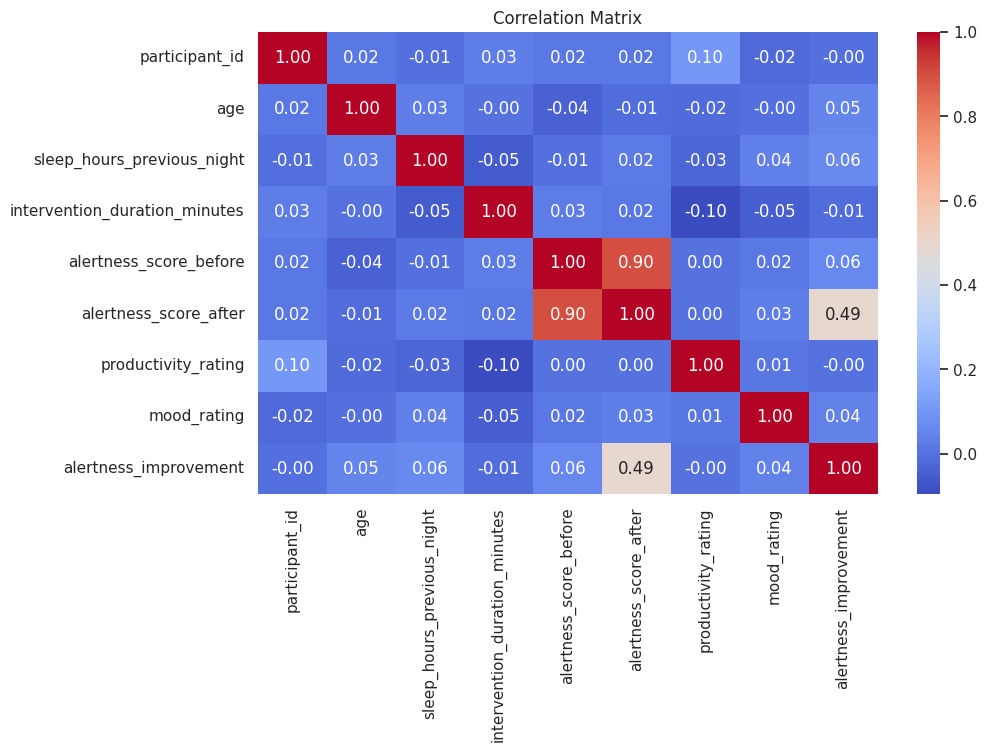

In [19]:
plt.figure()
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


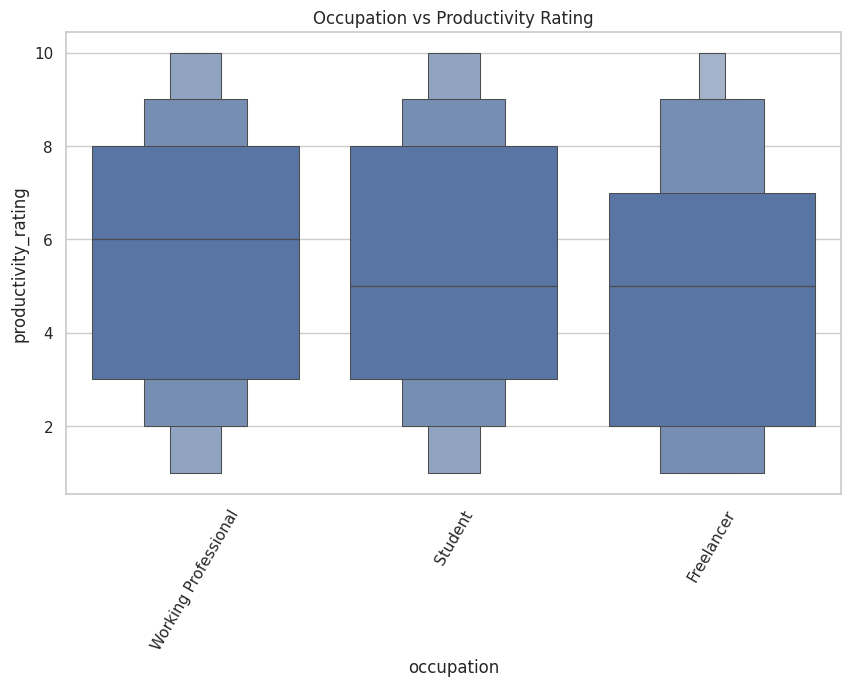

In [20]:
plt.figure()
sns.boxenplot(data=df, x="occupation", y="productivity_rating")
plt.xticks(rotation=60)
plt.title("Occupation vs Productivity Rating")
plt.show()


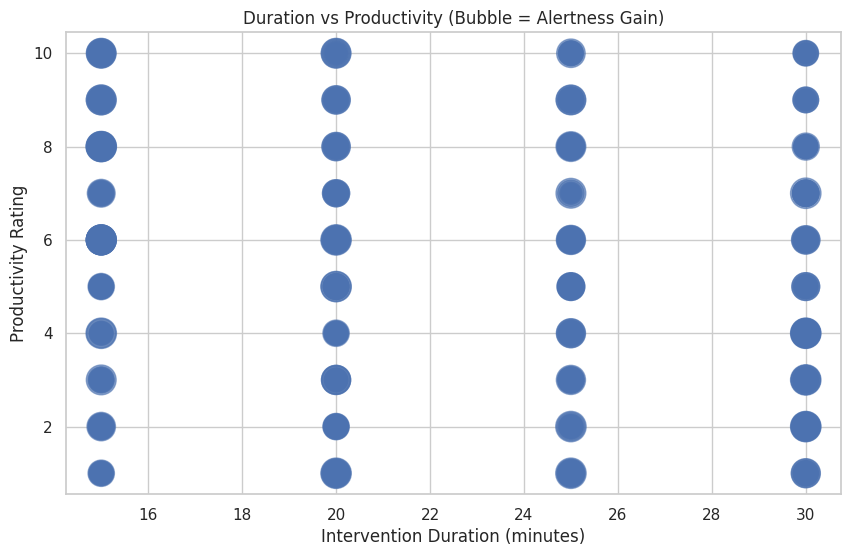

In [21]:
plt.figure()
sizes = df["alertness_improvement"] * 20
plt.scatter(df["intervention_duration_minutes"],
            df["productivity_rating"],
            s=sizes,
            alpha=0.6)

plt.xlabel("Intervention Duration (minutes)")
plt.ylabel("Productivity Rating")
plt.title("Duration vs Productivity (Bubble = Alertness Gain)")
plt.show()


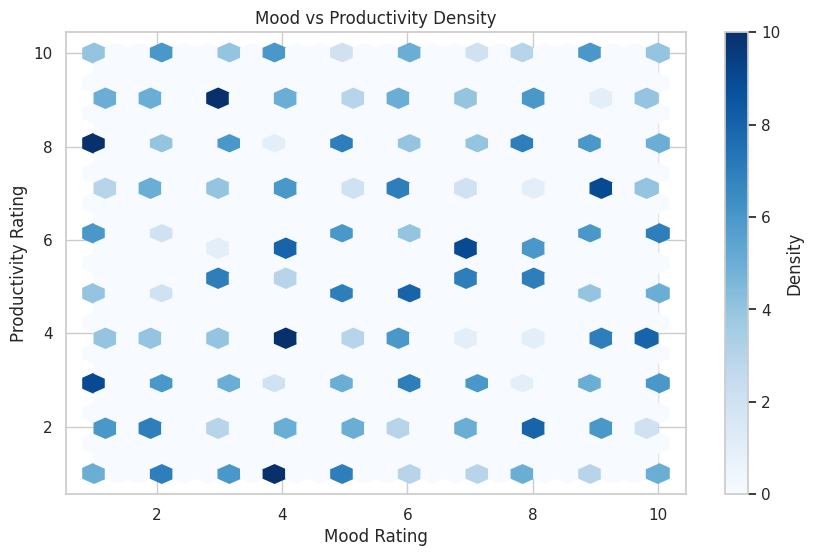

In [22]:
plt.figure()
plt.hexbin(df["mood_rating"], df["productivity_rating"], gridsize=25, cmap="Blues")
plt.colorbar(label="Density")
plt.xlabel("Mood Rating")
plt.ylabel("Productivity Rating")
plt.title("Mood vs Productivity Density")
plt.show()


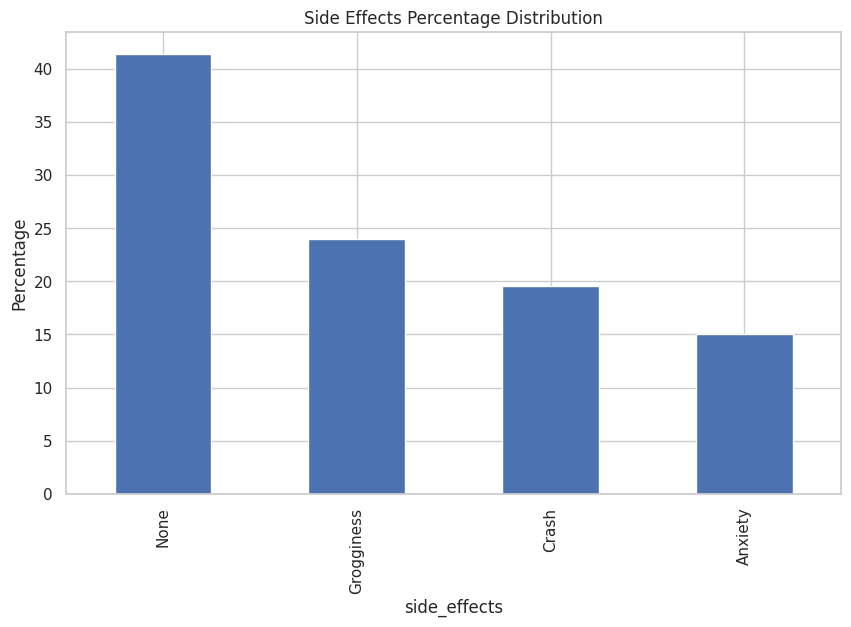

In [23]:
side_counts = df["side_effects"].value_counts(normalize=True) * 100

plt.figure()
side_counts.plot(kind="bar")
plt.title("Side Effects Percentage Distribution")
plt.ylabel("Percentage")
plt.show()


In [24]:
fig = px.scatter_3d(df,
                    x="sleep_hours_previous_night",
                    y="alertness_improvement",
                    z="productivity_rating",
                    color="intervention_type",
                    size="intervention_duration_minutes",
                    title="3D Interactive Alertness Analysis")

fig.show()


In [25]:
grouped = df.groupby("intervention_type")[[
    "alertness_improvement",
    "productivity_rating",
    "mood_rating"
]].mean()

fig = go.Figure()

for intervention in grouped.index:
    fig.add_trace(go.Scatterpolar(
        r=grouped.loc[intervention],
        theta=grouped.columns,
        fill='toself',
        name=intervention
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title="Intervention Performance Radar"
)

fig.show()


## Preparing ml algo


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [27]:
df = df.copy()

# Drop ID column
if "participant_id" in df.columns:
    df = df.drop(columns=["participant_id"])

# Create target
df["alertness_improvement"] = (
    df["alertness_score_after"] - df["alertness_score_before"]
)

# Define X and y
X = df.drop(columns=["alertness_improvement"])
y = df["alertness_improvement"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
categorical_cols = ["occupation", "intervention_type", "side_effects"]

encoders = {}

for col in categorical_cols:
    le = LabelEncoder()

    # Fit only on train
    X_train[col] = le.fit_transform(X_train[col].astype(str))

    # Transform test using same encoder
    X_test[col] = le.transform(X_test[col].astype(str))

    encoders[col] = le

In [30]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=8,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=300, random_state=42)

In [31]:
y_pred = model.predict(X_test)


In [32]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

Model Performance:
MAE : 1.6165771757410743
RMSE: 1.948179133178974
R2  : 0.8405634954293837


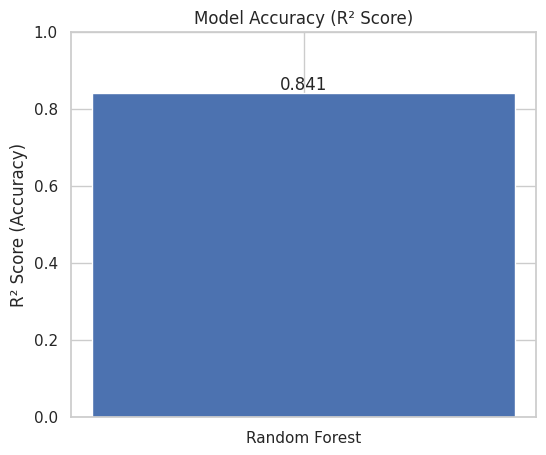

In [33]:
# Accuracy value
r2 = 0.8405634954293837

# Create bar chart
plt.figure(figsize=(6,5))
bars = plt.bar(["Random Forest"], [r2])

# Add value on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 0.01,
             round(yval, 3),
             ha='center',
             fontsize=12)

plt.ylim(0, 1)
plt.ylabel("R² Score (Accuracy)")
plt.title("Model Accuracy (R² Score)")
plt.show()

## Thank you...pls upvote!!!!